<a target="_blank" href="https://colab.research.google.com/github/lm2612/Tutorials/blob/main/2_supervised_learning_classification/answers/2-Classification_Titanic.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Answers
# Titanic: Machine learning from disaster

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this tutorial, we will use passenger data to predict who survived the shipwreck and also use our predictive model to answer the question: "what sorts of people were more likely to survive?". We will focus on passenger age, gender and socio-economic class). You can read more about the Titanic dataset [here](https://www.kaggle.com/c/titanic/overview).

First, import packages and load the data.

In [1]:
import sys 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    filepath = "https://raw.githubusercontent.com/lm2612/Tutorials/refs/heads/main/2_supervised_learning_classification/titanic.csv"
    print(f"Notebook running in google colab. Using raw github filepath = {filepath}")

else:
    filepath = "../titanic.csv"
    print(f"Notebook running locally. Using local filepath = {filepath}")


Notebook running locally. Using local filepath = ../titanic.csv


In [3]:
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We are interested in the "Survived" column, where are two possible outcomes: survived (1) or did not survive (0). We want to build a classifier to predict this outcome. In this tutorial, we are going to compare different classification methods, where we try to determine the factors that influence whether a passenger survived. 
Specifically, we are going to investigate how the passenger class, age and sex influenced survival.

For passenger class, we are going to use dummy variables to represent the three possible states: binary variables which take on the value 0 if not true and 1 if true.

Create dummy variables for classes 1 and 2. This implicitly means that the 3rd class will be the base case that we compare to.

In [4]:
df.loc[df['Pclass']==3, 'Pclass'] = 0
df.loc[df['Pclass']==2, 'Pclass'] = 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Create a dummy variable equal to 1 if the passenger was female.


In [5]:
df.loc[df['Sex']=='male', 'Sex'] = 0
df.loc[df['Sex']=='female', 'Sex'] = 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,0,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


Clean up the data - drop all variables except for the 'Age', 'Sex', 'Pclass' for our inputs and  'Survived' for our outputs.

In [6]:
df = df[['Age', 'Sex', 'Pclass', 'Survived']]
df = df.dropna()
df.head()

,Age,Sex,Pclass,Survived
0,22.0,0,0,0
1,38.0,1,1,1
2,26.0,1,0,1
3,35.0,1,1,1
4,35.0,0,0,0


Split the data into training, validation and test data

In [7]:
# Split into ~60% training, 20% validation, 20% test
training = df.iloc[:428, :]
validation = df.iloc[428:571, :]
testing = df.iloc[571:, :]

Set up your X and y variables


In [8]:
X = training[['Age', 'Sex', 'Pclass']].values
y = training['Survived'].values

## Logistic regression
We will use the `sklearn.linear_model.LogisticRegression`. Read the docs here: https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html

In [27]:
import sklearn
from sklearn.linear_model import LogisticRegression

# Set up and fit the logistic regression model
reg = LogisticRegression()
reg.fit(X, y)

LogisticRegression()

What variable is given the most relevance for a prediction?

In [26]:
print(reg.intercept_, reg.coef_)

[-1.47085697] [[-0.02690141  2.55731822  1.49647011]]


Based on the coefficients, the second variable (sex) seems most important in determining the prediction. Specifically, being a female makes it more likely that the person survives.

## Validating our classification model
Predict on the validation dataset and estimate accuracy using one of the classification metrics from [here](https://scikit-learn.org/1.5/modules/model_evaluation.html#classification-metrics)

In [11]:
X_validation = validation[['Age', 'Sex', 'Pclass']].values
y_validation = validation['Survived'].values
y_reg_validation = reg.predict(X_validation)

# We will also check performance on the training dataset
y_reg_training = reg.predict(X)


We will use accuracy is the proportion of all classifications that were correct, whether positive or negative. 

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_validation, y_reg_validation)

0.7412587412587412

You could also look at precision (the proportion of all the model's positive classifications that are actually positive), recall (true positive rate) or false positive rate. 

In [14]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_validation, y_reg_validation), recall_score(y_validation, y_reg_validation))

0.7727272727272727 0.5573770491803278


## Decision tree

Now build decision tree using `sklearn.tree.DecisionTreeClassifier` using the docs here: https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier. Use the entropy criterion for splitting we discussed during lectures.

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = "entropy")
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

How does the decision tree compare against the logistic regression

In [16]:
y_tree_validation = tree.predict(X_validation)
print(accuracy_score(y_validation, y_tree_validation),
      precision_score(y_validation, y_tree_validation), 
      recall_score(y_validation, y_tree_validation))


0.7762237762237763 0.8918918918918919 0.5409836065573771


We see slight improvements on the accuracy and precision metrics, but not on the recall score.

## Visualising how good the model is
We can look at how often the models produce false positives and false negatives using a [confusion matrix](https://scikit-learn.org/1.5/auto_examples/model_selection/plot_confusion_matrix.html). It shows:


```
                           | Predicted Negatives (0) | Predicted Positives (1) |
--------------------------------------------------------------------------------
True Negatives (0)         | True Negatives          | False Positives         |
True Positives (1)         | False Negatives         | True Positives          |
```

We want higher values along the upper left to lower right diagonal (more true negatives / true positives) and lower values in the opposite diagonal (fewer false negatives / false positives).

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_reg = confusion_matrix(y_validation, y_reg_validation)
cm_tree = confusion_matrix(y_validation, y_tree_validation)
cm_reg, cm_tree

(array([[72, 10],
        [27, 34]]),
 array([[78,  4],
        [28, 33]]))

Text(0.5, 1.0, 'Regression')

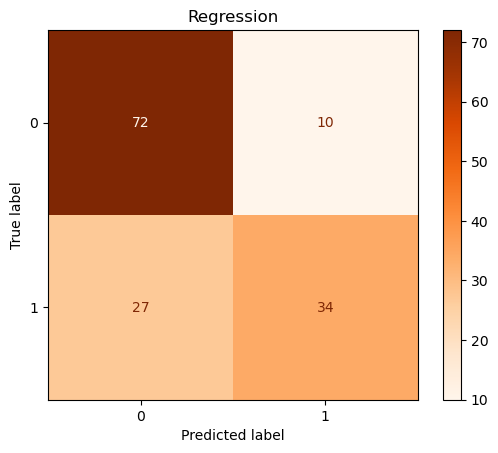

In [18]:
ConfusionMatrixDisplay.from_predictions(y_validation, y_reg_validation, cmap = "Oranges")
plt.title("Regression")

Text(0.5, 1.0, 'Tree')

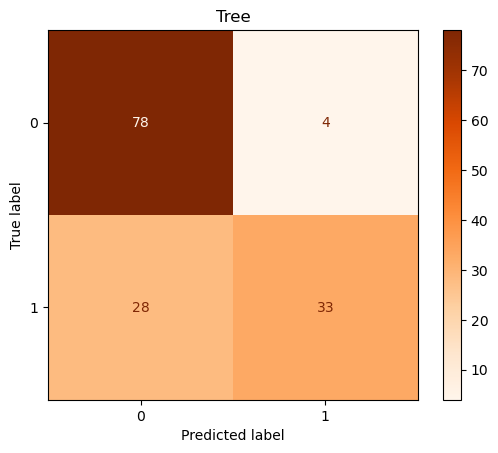

In [19]:
ConfusionMatrixDisplay.from_predictions(y_validation, y_tree_validation,  cmap = "Oranges")
plt.title("Tree")

The tree gives more true negatives but less true positives in this validation dataset.